#HW3　Monte Carlo control algorithm

1. deadline on 10/27
2. Upload HW3_name.ipynb and HW3_name.pdf to eeclass->homework.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
from matplotlib.table import Table

In [2]:
def drawTable(data):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(4):
    for j in range(3):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[i][2-j])
      if data[i][2-j][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow'))
      if data[i][2-j][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow'))
      if data[i][2-j][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))
      if data[i][2-j][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))

      plt.text(i+0.2,j+0.5,'%.2f' %data[i][2-j][0], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.2,'%.2f' %data[i][2-j][1], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.8,j+0.5,'%.2f' %data[i][2-j][2], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.8,'%.2f' %data[i][2-j][3], verticalalignment='center', horizontalalignment='center')


def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(image):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = 'white'

        tb.add_cell(2-j, i, width, height, text=val, 
                    loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(range(len(image[1]))):
        tb.add_cell(i, -1, width, height, text=label+1, loc='right', 
                    edgecolor='black', facecolor='white')
    # Column Labels...
    for j, label in enumerate(range(len(image))):
        tb.add_cell(-1, j, width, height/2, text=label+1, loc='center', 
                           edgecolor='black', facecolor='white')
    ax.add_table(tb)

### Enviroment
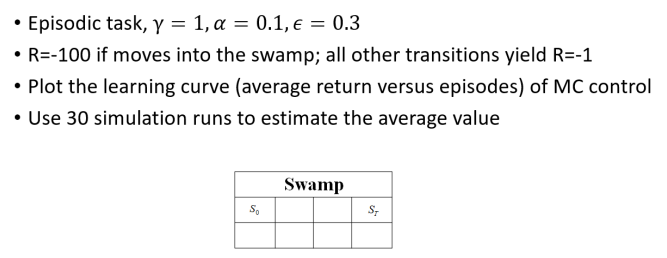

In [3]:
# left, up, right, down
ACTIONS = [np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0]),
           np.array([0, -1])]


In [4]:
# Maintain state with list datatype.
def step(state, action):
    state_n = (np.array(state) + action).tolist()
    
    if state_n[0] > 3 or state_n[0] < 0 or state_n[1] < 0 or state_n[1] > 2:
        state_n = state
    if state_n[1] == 2:
        reward = -100
    else:
        reward = -1
    
    return state_n, reward

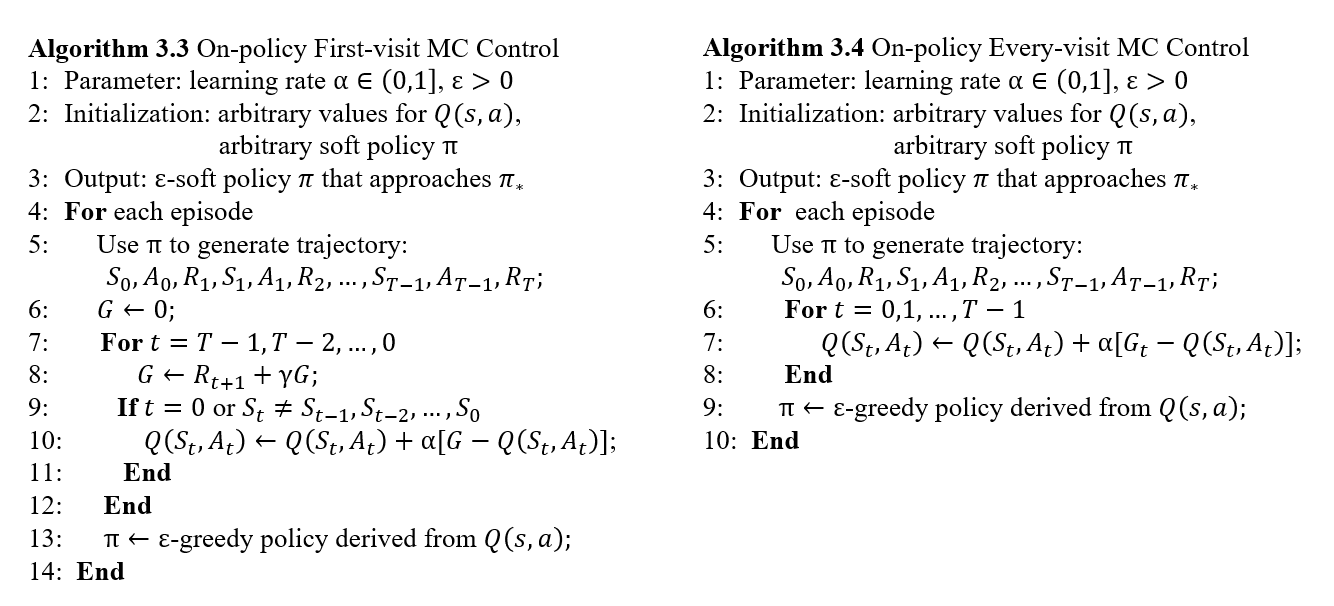

In [10]:
def episode(q_value):
    epsilon = 0.3
    s0 = [0, 1]
    st = [3, 1]
    returns = 0
    tra =[]
    state = s0
    while state != st:
      if rd.random() < epsilon:
        action = rd.randint(0,4)
      else: 
        action = np.argmax(q_value[state[0]][state[1]])
      state_n,reward = step(state, ACTIONS[action])
      tra.append([state, action, reward])
      state = state_n
        
    return tra

def episode_predict(q_value):
    epsilon = 0.3

    s0 = [0, 1]
    st = [3, 1]
    returns = 0
    tra =[]
    state = s0
    while state != st:
      min = -1000
      action = -1
      if rd.random() < epsilon:
          action = rd.randint(0,4)
      else: 
        for i in range(4):
          state_0, reward_0 = step(state, ACTIONS[i])
          if q_value[state_0[0]][state_0[1]] > min :
            min = q_value[state_0[0]][state_0[1]]
            action = i
      state_n, reward = step(state, ACTIONS[action])
      tra.append([state,action,reward])
      state = state_n
        
    return tra

# Result(60%):

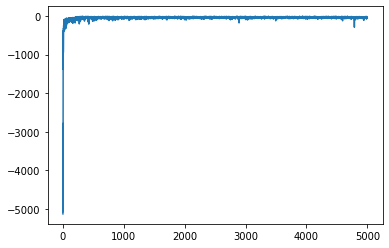

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# use 30 simulation, 1000 episode per simulation.
def every_visit_MC_state_action_value(): #on-policy every-visit MC for state_action_value
    q_value_table= []
    rewards_all = []
    alpha = 0.1
    learning_rate = 1 
    for simulation in range(30):

        q_value = rd.random([4,3,4])
        rewards = []
        q_value[3][1]=0
        for ep in range(5000):
            tra = episode(q_value)
            gain = 0 
            for t in range(len(tra)):
                G = 0
                for j in range(len(tra)-1,t-1,-1):
                    G = tra[j][2] + learning_rate * G
                q_value[tra[t][0][0]][tra[t][0][1]][tra[t][1]] = q_value[tra[t][0][0]][tra[t][0][1]][tra[t][1]] + alpha * (G - q_value[tra[t][0][0]][tra[t][0][1]][tra[t][1]])
                gain += tra[t][2]
            rewards.append(gain)
        rewards_all.append(rewards)
        q_value_table.append(q_value)

    q_value_table = np.average(q_value_table, axis = 0)
    #for plot
    x = np.array(rewards_all, dtype=object)
    y = np.average(x, axis = 0)
    plt.plot(y)
    plt.show()
    #for table
    drawTable(q_value_table)
    from google.colab import files #google.colab only
    plt.savefig("every_visit_MC_state_action_value.png")
    files.download("every_visit_MC_state_action_value.png") #google.colab only
    plt.close()

every_visit_MC_state_action_value()
    

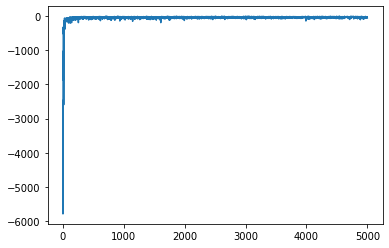

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
def first_visit_MC_state_action_value():#on-policy first-visit MC for state_action_value
    q_value_table = []
    rewards_all = []
    alpha = 0.1
    learning_rate = 1 
    for simulation in range(30):
        q_value = rd.rand(4,3,4)
        rewards = []
        q_value[3][1]=0
        for ep in range(5000):
            tra = episode(q_value)
            gain = 0 
            G = 0
            for t in range(len(tra)-1,-1,-1):
                gain += tra[t][2]
                x = 0
                G = tra[t][2]+ 1*G
                for j in range(t):
                    if tra[t][0]==tra[j][0]:
                        x = 1
                        break
                if t==0 or x == 0:
                    q_value[tra[t][0][0]][tra[t][0][1]][tra[t][1]] = q_value[tra[t][0][0]][tra[t][0][1]][tra[t][1]] + alpha * (G - q_value[tra[t][0][0]][tra[t][0][1]][tra[t][1]])
            rewards.append(gain)
        rewards_all.append(np.array(rewards))
        q_value_table.append(q_value)

    q_value_table = np.average(q_value_table, axis = 0)
    #plot learning curve
    x = np.array(rewards_all, dtype=object)
    y = np.average(x, axis = 0)
    plt.plot(y)
    plt.show()
    #for table
    drawTable(q_value_table)
    from google.colab import files #google.colab only
    plt.savefig("first_visit_MC_state_action_value.png")
    files.download("first_visit_MC_state_action_value.png") #google.colab only
    plt.close()

first_visit_MC_state_action_value()

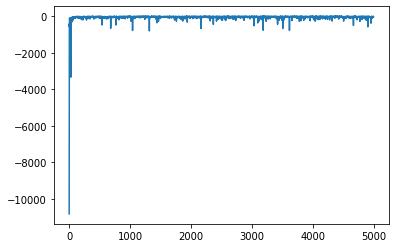

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
def every_visit_MC_state_value():#on-policy every-visit MC for state_value
    state_value_table = []
    rewards_all = []
    alpha = 0.1
    learning_rate = 1 
    for k in range(30):
        state_value = rd.random([4,3])
        rewards = []
        state_value[3][1]=0
        for ep in range(5000):
            tra = episode_predict(state_value)
            gain = 0 #for plot
            for t in range(len(tra)):
                G = 0
                gain += tra[t][2]
                for j in range(len(tra)-1,t-1,-1):
                    G = tra[j][2] + learning_rate * G
                state_value[tra[t][0][0]][tra[t][0][1]] = state_value[tra[t][0][0]][tra[t][0][1]] + alpha * (G - state_value[tra[t][0][0]][tra[t][0][1]])
            rewards.append(gain)
        rewards_all.append(rewards)
        state_value_table.append(state_value)

    state_value_table = np.average(state_value_table, axis = 0)
    #plot learning curve
    x = np.array(rewards_all, dtype=object)
    y = np.average(x, axis = 0)
    plt.plot(y)
    plt.show()
    #for table
    draw_image(np.round(state_value_table, decimals=2)) 
    from google.colab import files #google.colab only
    plt.savefig("every_visit_MC_state_value.png")
    files.download("every_visit_MC_state_value.png") #google.colab only  
    plt.close()

every_visit_MC_state_value()

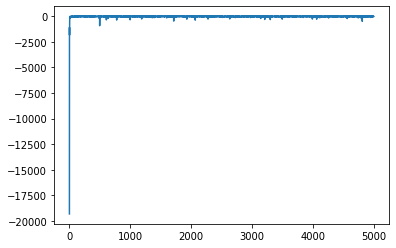

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
def first_visit_MC_state_value():#on-policy first-visit MC for state_value
    state_value_table = []
    rewards_all = []
    alpha = 0.1
    learning_rate = 1 
    for k in range(30):
        state_value = rd.random([4,3])
        state_value[3][1]=0
        rewards = []
        for ep in range(5000):
            tra = episode_predict(state_value)
            gain = 0 #for plot
            for t in range(len(tra)):
                gain += tra[t][2]
                x = 0
                for j in range(t):
                    if tra[t][0]==tra[j][0]:
                        x = 1
                        break
                G = 0
                for j in range(len(tra)-1,t-1,-1):
                    G = tra[j][2] + learning_rate * G
                if x == 0:
                    state_value[tra[t][0][0]][tra[t][0][1]] = state_value[tra[t][0][0]][tra[t][0][1]] + alpha * (G - state_value[tra[t][0][0]][tra[t][0][1]])
            rewards.append(gain)
        rewards_all.append(rewards)
        state_value_table.append(state_value)

    state_value_table = np.average(state_value_table, axis = 0)
    #plot learning curve
    x = np.array(rewards_all, dtype=object)
    y = np.average(x, axis = 0)
    plt.plot(y)
    plt.show()
    #for table
    draw_image(np.round(state_value_table, decimals=2)) 
    from google.colab import files #google.colab only
    plt.savefig("first_visit_MC_state_value.png")
    files.download("first_visit_MC_state_value.png") #google.colab only   
    plt.close()

first_visit_MC_state_value()

#Experiments and Analysis(40%)

1. Plot the q_values in your result.(20%)
2. Whether q_values are reasonable? Explain your result.(10%)
2. Transfer state-action values to state values and plot it.(10%) 



# **1. State action value**
# **Every-visit MC**

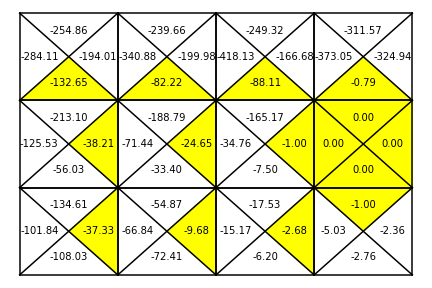

# **learning curve**

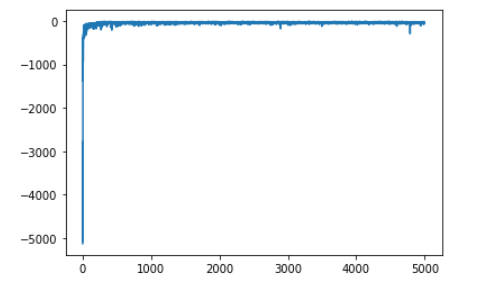

# **First-visit MC**

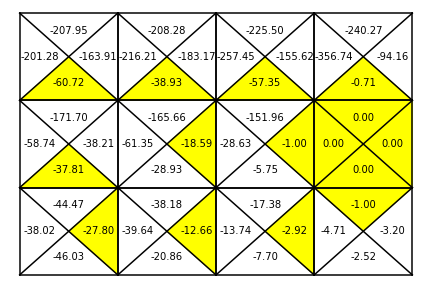

# **learning curve**

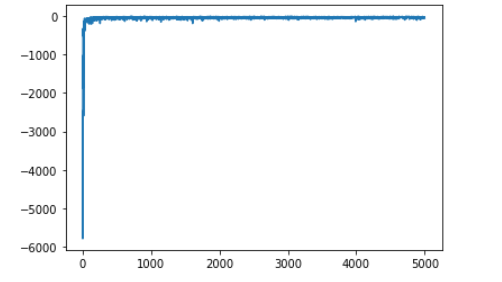

# **2.**

是合理的，因為從state_action _value圖中可以觀察到，基本在swamp中，往下的動作和往右的動作價值最大，因為可以脫離沼澤或是更接近終點。
而終點的動作價值都是0因為是在終點。而圖中可以看到起點的動作價值最大是往下動作可以離沼澤遠一點，因為epsilon-greedy action selection，所以有機會往上走到沼澤，因此往下的Reward比往右的Reward平均會高一點。

# **3.** **State value**

# **Every-visit MC**

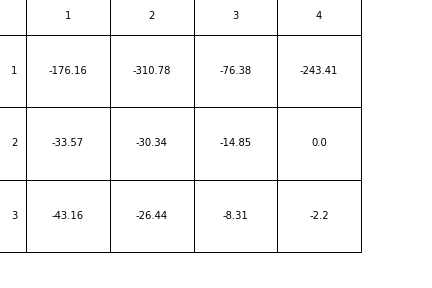

# **learning curve**

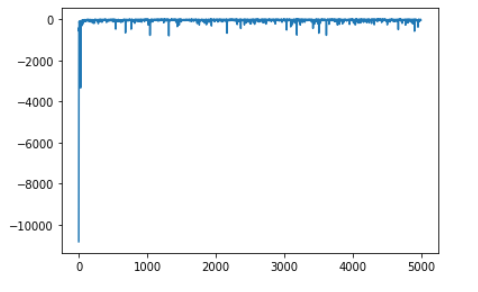

# **First-visit MC**

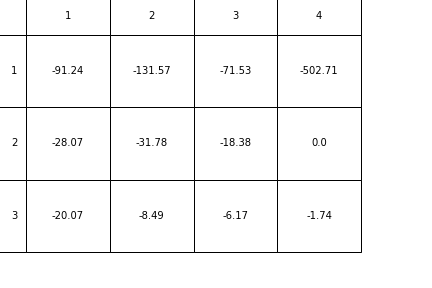

# **learning curve**

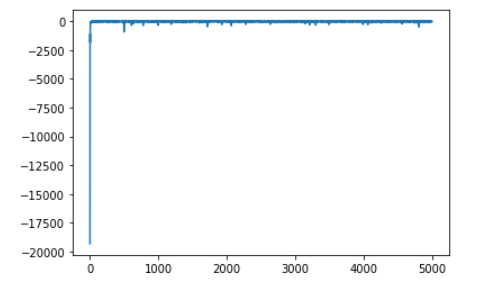

# Useful function

In [ ]:
# data type
a = [1,2,3,4]
b = np.array(a)
print(type(b))
b = b.tolist()
print(type(b))


In [ ]:
# clip
a = range(5)
b = np.clip(a,1,3)
print(b)

[1 1 2 3 3]


In [ ]:
# in
a = [[1,5],[2,5],[3,5]]
print([2,5] in a,[0,0] in a)



True False


In [ ]:
# add
state = [0,0]
action = np.array([1,2])
print(action + np.array(state))

In [ ]:
# inversed iterate
a = range(4,0,-1)
for i in a:
  print(i)

In [ ]:
# inversed iterate
a=np.array([[1,2,3,4],[7,8,9,7]])
c=[[4,5,6,7],[4,5,7,2]]

print(a[0][0])
print(c[0][0])


#b = np.average(b,axis=0)
#print(b)
#for i in reversed(a):
#  print(i)

#if 1 not in a[:2]:
#  print(a[:2])

1
4


In [ ]:
a=[0,1,2,3,4,5,6,7,8,9]
for i in range(len(a)-1,-1,-1):
    print(a[i])

9
8
7
6
5
4
3
2
1
0
